In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/Users/jstark/Desktop/TUD_classes/BNM/Exercise/Exercise_10_RungeKutta_Butcher_AdaptiveStepSize')
import RK_solvers

In [2]:
def adams_bashforth(y, n, h, f):
    assert(n >= 2) # Make sure solution array already contains first 3 time points
    # Return the solution to for the next time step n+1
    return y[n] + h/12 * (23 * f(y[n]) - 16 * f(y[n-1]) + 5 * f(y[n-2]))

def multi_stepper(initial_tp, integrationMethod, h, t0, tf, f):
    # The array/list initial_tp must contain the r initial solutions
    if len(np.shape(initial_tp)) > 1:
        r, m = np.shape(initial_tp)
    else:
        m = 1
        r = len(initial_tp)
    # Number of time steps to be computed
    N = round((tf-t0) / h)
    time = np.arange(t0, N*h, h)
    # Initialize empty array for the N solutions
    y = np.zeros([N, m])
    # Copy the r initial values to the solution array
    for i in range(r):
        y[i] = initial_tp[i]
    for n in range(r-1, N-1):
        y[n+1] = integrationMethod(y, n, h, f)
    return time, y
    
    

In [3]:
def predator_prey_model(X):
    # b: birth-rate of prey, d: death-rate of predator, c: contact-rate predator prey
    b = 1; d = 10; c = 1;
    # x1: prey concentration, x2: predator concentration
    x1 = X[0]; x2 = X[1];
    # System of ODE acc. to predator-prey model
    dx1 =  b*x1 - c*x1*x2
    dx2 = -d*x2 + c*x1*x2
    # return change in the concentrations of prey and predator 
    return np.array([dx1, dx2])

In [4]:
h = 0.01
t0 = 0
tf = 10
starting_values = np.array([[0.5, 1.0], [0.50023020652423, 0.90937363770619], [0.50089337004375, 0.82696413439848]])

In [5]:
time, y = multi_stepper(starting_values, adams_bashforth, h, t0, tf, predator_prey_model)

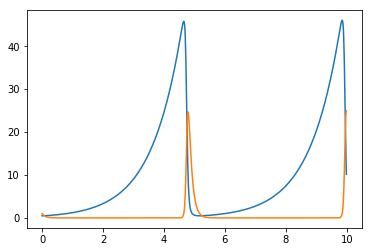

In [6]:
plt.plot(time, y)
None

# Compare with scipy solution

In [7]:
def predator_prey_model_time(t, X):
    # b: birth-rate of prey, d: death-rate of predator, c: contact-rate predator prey
    b = 1; d = 10; c = 1;
    # x1: prey concentration, x2: predator concentration
    x1 = X[0]; x2 = X[1];
    # System of ODE acc. to predator-prey model
    dx1 =  b*x1 - c*x1*x2
    dx2 = -d*x2 + c*x1*x2
    # return change in the concentrations of prey and predator 
    return np.array([dx1, dx2])

In [8]:
from scipy.integrate import RK45, solve_ivp, odeint

In [9]:
sol_scipy_1 = solve_ivp(predator_prey_model_time, [t0, tf], starting_values[0], RK45)

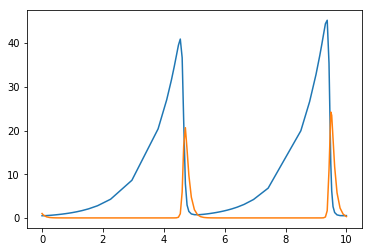

In [10]:
plt.plot(sol_scipy_1.t, sol_scipy_1.y[0])
plt.plot(sol_scipy_1.t, sol_scipy_1.y[1])

In [11]:
sol_scipy_2 = odeint(predator_prey_model_time, starting_values[0], time, tfirst=True)

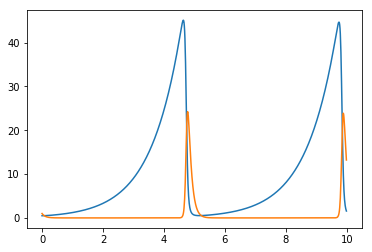

In [12]:
plt.plot(time, sol_scipy_2)